In [66]:
import pandas as pd
import datetime as dt
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


In [67]:
base_vendedores = pd.read_csv('data/vendedores.csv', sep=';')
base_pracas = pd.read_csv('data/pracas.csv', sep=';')
base_desempenhoPraca = pd.read_csv('data/desempenhoPraca.csv', sep=';')
base_pedidos = pd.read_csv('data/pedidos.csv', sep=';')
base_fechamentos = pd.read_csv('data/fechamentos.csv', sep=';')
base_sacoleiras = pd.read_csv('data/sacoleiras.csv', sep=';')
base_artigosPedido = pd.read_csv('data/artigosPedido.csv', sep=';')
base_gruposArtigos = pd.read_csv('data/grupos.csv', sep=';')
base_artigos = pd.read_csv('data/artigos.csv', sep=';')
base_artigosPedido['ano_mes_cobranca'] = pd.to_datetime(base_artigosPedido['ano_mes_cobranca'], format='%m/%Y').dt.date
base_desempenhoPraca['ano_mes_cobranca'] = pd.to_datetime(base_desempenhoPraca['ano_mes_cobranca'], format='%Y-%m').dt.date
base_pedidos['ano_mes_cobranca'] = pd.to_datetime(base_pedidos['ano_mes_cobranca'], format='%m/%Y').dt.date

In [68]:
base_fechamentos.columns

Index(['id_pedido', 'status', 'ano_sem_pedido', 'ano_sem_cobranca',
       'quant_devolvida', 'quant_vendida', 'valor_venda_pedido',
       'per_comissao', 'valor_comissao_sacoleira', 'valor_liquido',
       'valor_liquido_recebido', 'valor_recebido', 'valor_pepino',
       'valor_fator_venda', 'valor_dinheiro', 'valor_cheque', 'valor_cartao',
       'data_fechamento', 'hora_fechamento', 'quantidade_devolvida_original',
       'valor_venda_original', 'status_original', 'data_original',
       'hora_original', 'id_vendedor', 'id_praca', 'valor_total_pedido',
       'id_sacoleira', 'descricao_praca', 'ano_sem_pedido_data',
       'ano_mes_pedido', 'ano_pedido', 'ano_sem_cobranca_data',
       'ano_mes_cobranca', 'ano_cobranca'],
      dtype='object')

In [69]:
base_pedidos.status.unique()

array(['FECHADO', 'PEPINO', 'TRANSFERIDO', 'DIGITADO'], dtype=object)

In [70]:
pepinos = base_pedidos[base_pedidos['status'] == 'PEPINO']

In [71]:
#pepinos = pepinos[pepinos['ano_cobranca'] == 2023]
pepinos = pepinos.merge(base_sacoleiras[['nome', 'cidade', 'id_sacoleira', 'idade']], on='id_sacoleira')
pepinos = pepinos.merge(base_vendedores[['descricao_vendedor', 'id_vendedor']], on='id_vendedor')
pepinos = pepinos.merge(base_fechamentos[['id_pedido', 'valor_pepino']], on= 'id_pedido')

In [72]:
pepinos_com_idade = pepinos[pepinos.idade > 18]
pepinos_com_idade = pepinos_com_idade[pepinos_com_idade.idade < 100]


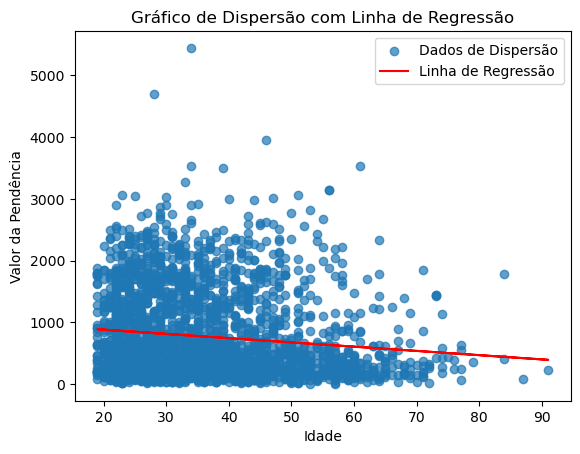

In [73]:
# Seus dados de idade e valor da pendência
idade = pepinos_com_idade.idade
valor_pendencia = pepinos_com_idade.valor_pepino

# Calcular a linha de regressão linear
coeficientes = np.polyfit(idade, valor_pendencia, 1)
linha_regressao = coeficientes[0] * idade + coeficientes[1]

# Criar o gráfico de dispersão
plt.scatter(idade, valor_pendencia, alpha=0.7, label='Dados de Dispersão')

# Adicionar a linha de regressão
plt.plot(idade, linha_regressao, color='red', label='Linha de Regressão')

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Valor da Pendência')
plt.title('Gráfico de Dispersão com Linha de Regressão')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()

In [74]:
pepinos_group = pepinos.groupby(by=['descricao_vendedor']).agg({'id_pedido': 'count', 'valor_total_pedido': 'sum','valor_pepino': 'sum' })
pepinos_group

,id_pedido,valor_total_pedido,valor_pepino
descricao_vendedor,,,
ALEX DOS SANTOS OLIVEIRA (ALS),184,650272.28,163407.86
ALEXANDRE PAIVA (ALP),207,581255.38,176660.30
ANTONIO CARLOS LEITE (ANC),162,365415.78,76449.59
ANTONIO JOSE DOS SANTOS (ANJ),68,223384.76,25758.34
ANTONIO MARCOS (ANM),1,2882.80,307.42
AUGUSTINHO CESAR PELEGRINI (AUC),61,176579.17,19255.20
CARLOS JOSE MEDINA CUNHA (CAJ),187,541750.20,177433.26
CAROLINE FIGUEIREDO DURVAL CAF,179,430840.70,204413.05
CLAUDEMIR APARECIDO DA SILVA (CLA),19,48163.30,24052.46


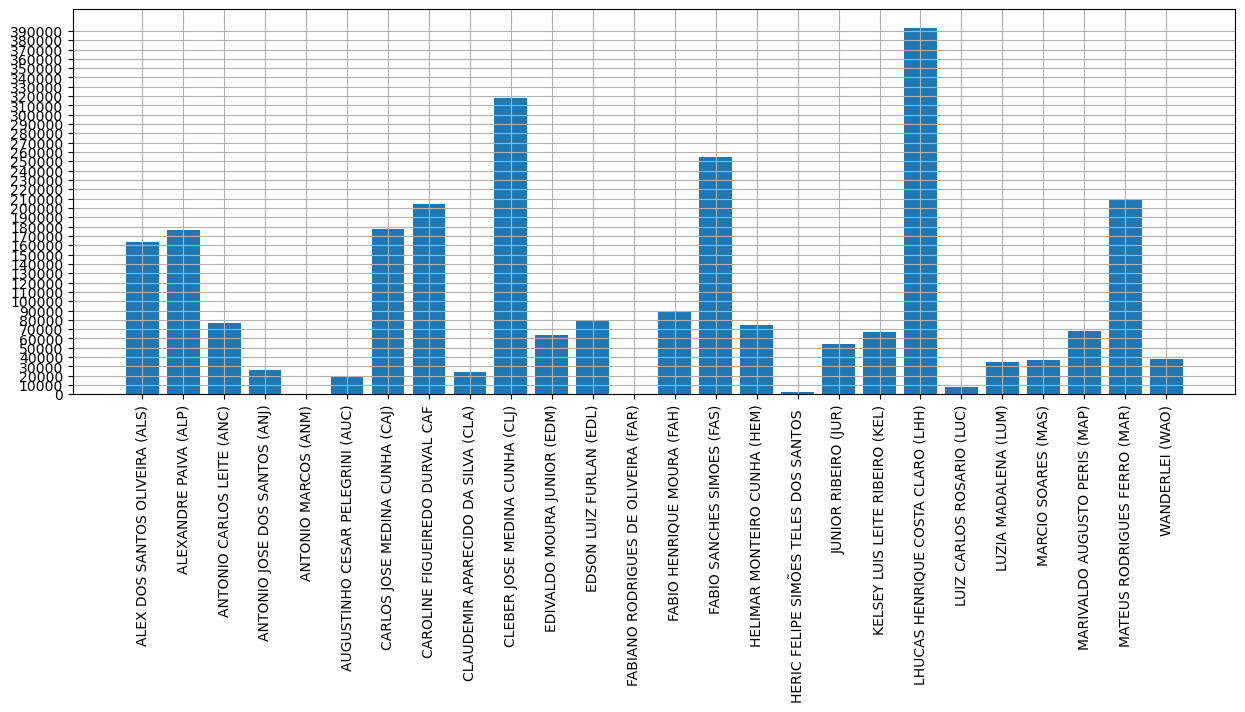

In [75]:
plt.figure(figsize=(15,5))
plt.bar(pepinos_group.index , pepinos_group['valor_pepino'])
y_ticks = np.arange(0, max(pepinos_group.valor_pepino) +1000, 10000) # type: ignore
plt.grid(True)
plt.yticks(y_ticks)
plt.xticks(rotation=90)
plt.show()

In [76]:
pedidos = base_pedidos[base_pedidos['ano_cobranca'] == 2023]
pedidos = pedidos.merge(base_sacoleiras[['nome', 'cidade', 'id_sacoleira', 'idade']], on='id_sacoleira')
pedidos = pedidos.merge(base_vendedores[['descricao_vendedor', 'id_vendedor']], on='id_vendedor')
pedidos = pedidos.merge(base_fechamentos[['id_pedido', 'valor_pepino']], on= 'id_pedido')

In [77]:
pedidos.columns

Index(['id_pedido', 'ano_sem_pedido', 'ano_sem_cobranca', 'id_praca',
       'id_sacoleira', 'status', 'quantidade_entregue',
       'valor_total_sem_comissao', 'valor_total_com_comissao',
       'valor_total_pedido', 'data_retorno', 'data_pedido', 'id_vendedor',
       'descricao_praca', 'ano_sem_pedido_data', 'ano_mes_pedido',
       'ano_pedido', 'ano_sem_cobranca_data', 'ano_mes_cobranca',
       'ano_cobranca', 'quant_vendida', 'valor_venda_pedido', 'valor_liquido',
       'nome', 'cidade', 'idade', 'descricao_vendedor', 'valor_pepino'],
      dtype='object')

In [78]:
pedidos_com_idade = pedidos[pedidos['idade'] > 18]

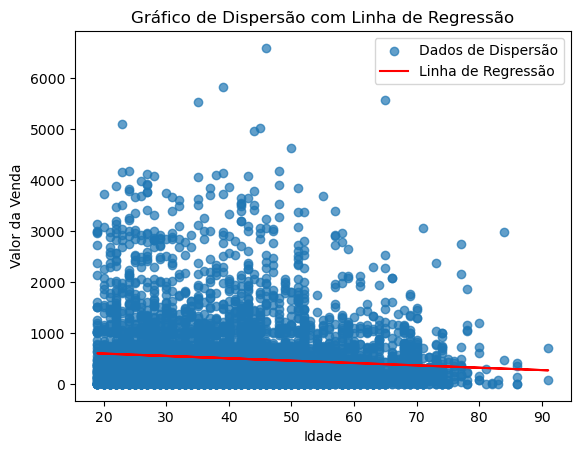

In [79]:
# Seus dados de idade e valor da pendência
idade = pedidos_com_idade.idade
valor_venda = pedidos_com_idade.valor_venda_pedido

# Calcular a linha de regressão linear
coeficientes = np.polyfit(idade, valor_venda, 1)
linha_regressao = coeficientes[0] * idade + coeficientes[1]

# Criar o gráfico de dispersão
plt.scatter(idade, valor_venda, alpha=0.7, label='Dados de Dispersão')

# Adicionar a linha de regressão
plt.plot(idade, linha_regressao, color='red', label='Linha de Regressão')

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Valor da Venda')
plt.title('Gráfico de Dispersão com Linha de Regressão')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()